In [371]:
import matplotlib.pyplot as plt
import random
import numpy as np
import time
import copy
import array as arr

In [372]:
W=6;
L=6;
n=W*L*12;
S=np.zeros((n,3));
Pe=0.1;

s0=[1,3,5];
s1=[5,4,2];
s1n=[5,5,4];

s2=[5,4,2];

In [373]:
#####1a

In [374]:
for i in range(n):
    S[i][0]=int(i//(L*12));
    S[i][1]=int((i//(12))%6);
    S[i][2]=int(i%12);

In [375]:
#### 1b

In [376]:
A=['ST','FL','FS','FR','BL','BS','BR'];
a1=A[1];

In [377]:
#####1c

In [378]:
def probsa(Pe,s1,a1,s1n):
    if np.sqrt(abs(s1n[0]-s1[0])**2+abs(s1n[1]-s1[1])**2)>1:
        psa=0;
    elif a1==A[0]:
        psa=1;
    elif (s1[2]-s1n[2])==2 or (s1[2]-s1n[2])==-10:
        if a1==A[1] or a1==A[4]:
            psa=Pe;
        else:
            psa=0;
    elif (s1n[2]-s1[2])==2 or (s1n[2]-s1[2])==-10:
        if a1==A[3] or a1==A[6]:
            psa=Pe;
        else:
            psa=0;
    elif abs(s1[2]-s1n[2])==1:
        if a1==A[1] or a1==A[3] or a1==A[4] or a1==A[6]:
            psa=1-2*Pe;
        elif a1==A[2] or a1==A[5]:
            psa=Pe;       
    elif abs(s1[2]-s1n[2])==0:
        if a1==A[1] or a1==A[3] or a1==A[4] or a1==A[6]:
            psa=Pe;
        elif a1==A[2] or a1==A[5]:
            psa=1-2*Pe;
    else:
        psa=0;
    return psa


In [379]:
probsa(Pe,s1,a1,s1n)

0

In [380]:
####1d

In [381]:
def nextstate(Pe,s1,a1):
    s1n=s1.copy();
    if a1==A[0]:
        s1n=s1n;
    else:
        r=random.uniform(0, 1);
        if r<Pe:
            s1n[2]=s1n[2]-1;
        elif Pe<=r<2*Pe:
            s1n[2]=s1n[2]+1;
        if a1==A[1] or a1==A[2] or a1==A[3]:
            if s1n[2]==11 or s1n[2]==0 or s1n[2]==1:
                s1n[1]=s1n[1]+1;
            elif s1n[2]==2 or s1n[2]==3 or s1n[2]==4:
                s1n[0]=s1n[0]+1;
            elif s1n[2]==5 or s1n[2]==6 or s1n[2]==7:
                s1n[1]=s1n[1]-1;
            elif s1n[2]==8 or s1n[2]==9 or s1n[2]==10:
                s1n[0]=s1n[0]-1;
        elif a1==A[4] or a1==A[5] or a1==A[6]:
            if s1n[2]==11 or s1n[2]==0 or s1n[2]==1:
                s1n[1]=s1n[1]-1;
            elif s1n[2]==2 or s1n[2]==3 or s1n[2]==4:
                s1n[0]=s1n[0]-1;
            elif s1n[2]==5 or s1n[2]==6 or s1n[2]==7:
                s1n[1]=s1n[1]+1;
            elif s1n[2]==8 or s1n[2]==9 or s1n[2]==10:
                s1n[0]=s1n[0]+1;
                
        if a1==A[1] or a1==A[4]:
            s1n[2]=s1n[2]-1;
        elif a1==A[3] or a1==A[6]:
            s1n[2]=s1n[2]+1;
            
        if s1n[2]>11:
            s1n[2]=s1n[2]-12;
        if s1n[0]>5:
            s1n[0]=s1n[0]-1;
        if s1n[0]<0:
            s1n[0]=s1n[0]+1;
        if s1n[1]>5:
            s1n[1]=s1n[1]-1;
        if s1n[1]<0:
            s1n[1]=s1n[1]+1;
    return s1n


In [382]:
for i in range(50):
    s1n=nextstate(Pe,s1,a1);
    print(s1n);

[5, 4, 1]
[5, 4, 2]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 5, 0]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 2]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 5, 0]
[5, 4, 1]
[5, 4, 2]
[5, 4, 1]
[5, 5, 0]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 2]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]
[5, 4, 1]


In [383]:
### The returned value s'follows the probability distribution specified by psa.

In [384]:
def nextallstates(s1,a1):
    s1n=np.zeros((3,3));
    
    s1n[0]=s1;
    s1n[1]=s1;
    s1n[2]=s1;
    if a1==A[0]:
        s1n[0]=s1;
    else:
        s1n[1][2]=s1[2]-1;
        s1n[2][2]=s1[2]+1;
        for i in range(3):
            if a1==A[1] or a1==A[2] or a1==A[3]:
                if s1n[i][2]==11 or s1n[i][2]==0 or s1n[i][2]==1:
                    s1n[i][1]=s1n[i][1]+1;
                elif s1n[i][2]==2 or s1n[i][2]==3 or s1n[i][2]==4:
                    s1n[i][0]=s1n[i][0]+1;
                elif s1n[i][2]==5 or s1n[i][2]==6 or s1n[i][2]==7:
                    s1n[i][1]=s1n[i][1]-1;
                elif s1n[i][2]==8 or s1n[i][2]==9 or s1n[i][2]==10:
                    s1n[i][0]=s1n[i][0]-1;
            elif a1==A[4] or a1==A[5] or a1==A[6]:
                if s1n[i][2]==11 or s1n[i][2]==0 or s1n[i][2]==1:
                    s1n[i][1]=s1n[i][1]-1;
                elif s1n[i][2]==2 or s1n[i][2]==3 or s1n[i][2]==4:
                    s1n[i][0]=s1n[i][0]-1;
                elif s1n[i][2]==5 or s1n[i][2]==6 or s1n[i][2]==7:
                    s1n[i][1]=s1n[i][1]+1;
                elif s1n[i][2]==8 or s1n[i][2]==9 or s1n[i][2]==10:
                    s1n[i][0]=s1n[i][0]+1;

            if a1==A[1] or a1==A[4]:
                s1n[i][2]=s1n[i][2]-1;
            elif a1==A[3] or a1==A[6]:
                s1n[i][2]=s1n[i][2]+1;

            if s1n[i][2]>11:
                s1n[i][2]=s1n[i][2]-12;
            if s1n[i][0]>5:
                s1n[i][0]=s1n[i][0]-1;
            if s1n[i][0]<0:
                s1n[i][0]=s1n[i][0]+1;
            if s1n[i][1]>5:
                s1n[i][1]=s1n[i][1]-1;
            if s1n[i][1]<0:
                s1n[i][1]=s1n[i][1]+1;
    print(s1n[0][0])
    if s1n[0][0]==s1n[1][0]==s1n[2][0] and s1n[0][1]==s1n[1][1]==s1n[2][1] and s1n[0][2]==s1n[1][2]==s1n[2][2]:
        s1n = np.delete(s1n, (2), axis=0)
        s1n = np.delete(s1n, (1), axis=0)
    elif s1n[0][0]==s1n[1][0] and s1n[0][1]==s1n[1][1] and s1n[0][2]==s1n[1][2]:
        s1n = np.delete(s1n, (0), axis=0)
    elif s1n[2][0]==s1n[1][0] and s1n[2][1]==s1n[1][1] and s1n[2][2]==s1n[1][2]:
        s1n = np.delete(s1n, (1), axis=0)
    elif s1n[0][0]==s1n[2][0] and s1n[0][1]==s1n[2][1] and s1n[0][2]==s1n[2][2]:
        s1n = np.delete(s1n, (0), axis=0)

    return s1n

In [385]:
####2

In [386]:

R=np.array([[-100,-100,-100,-100,-100,-100],
            [-100,   0,   0,   0,   0,-100],
            [-100,   0, -10, -10, -10,-100],
            [-100,   0,   0,   0,   1,-100],
            [-100,   0, -10, -10, -10,-100],
            [-100,-100,-100,-100,-100,-100]]);


In [387]:
# In order to match the graph given in homework, we need to adjust the matrix oder since array is in form (x,y) and first line is 0 row

In [388]:
#3a

In [389]:
pi0=[[['FL' for a in range(12)]for b in range(6)]for c in range(6)]


In [390]:
pi0

[[['FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL'],
  ['FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL'],
  ['FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL'],
  ['FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL'],
  ['FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL'],
  ['FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL']],
 [['FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL'],
  ['FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL'],
  ['FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL'],
  ['FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL'],
  ['FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL'],
  ['FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL']],
 [['FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL'],
  ['FL', '

########3b

In [391]:
def route (policy,s0,pe):
    curstate = s0;
    path = np.zeros((100,3));
    for i in range(100) :
        act = policy[curstate[0]][curstate[1]][curstate[2]];
        n_state = nextstate(pe,curstate,act);
        path[i,:] = n_state;
        plt.plot([curstate[0],n_state[0]],[curstate[1],n_state[1]],'ro-');
        curstate = n_state;
    plt.xlim(0,5)
    plt.ylim(0,5)
    plt.show();
    return path

In [392]:
######3c

IndexError: list index out of range

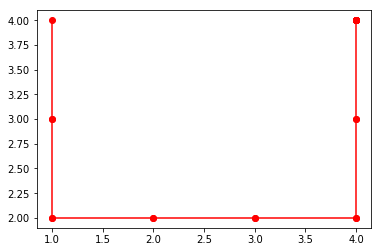

In [393]:
route(pi0,[1,4,6],0)

In [394]:
######3d

In [395]:
def evalpolicy (policy,discount):
    v = np.zeros((6,6,12));
    x = np.ones((6,6,12))
    while (np.amax(x)>0.01):
        v_old = copy.deepcopy(v);
        for i in range(6):
            for y in range(6):
                for u in range(12):
                    nx = nextstate(0,[i,y,u],policy[i][y][u])
                    v[i,y,u] = probsa(0,[i,y,u],policy[i][y][u],nextstate(0,[i,y,u],policy[i][y][u]))*(R[nx[0],nx[1]]+discount*v[i,y,u])
                    #print ([i,y,u],nextstate(0,[i,y,u],policy[i,y]),probsa(0,[i,y,u],policy[i,y],nextstate(0,[i,y,u],policy[i,y])),R[i,y])
                    # Using the formula from class, and sum through all possible states
                    # In fact, since we assume pe=0. We can use one state, since under specific action, the probility is always 1
                    #print("\n")
                    
                    x = v-v_old;
    return v

In [396]:
######3e

In [397]:
evalpolicy(pi0,0.9)

array([[[-991.27203643, -991.27203643, -991.27203643, -991.27203643,
         -991.27203643, -991.27203643, -991.27203643, -991.27203643,
         -991.27203643, -991.27203643, -991.27203643, -991.27203643],
        [-991.27203643, -991.27203643,    0.        ,    0.        ,
            0.        , -991.27203643, -991.27203643, -991.27203643,
         -991.27203643, -991.27203643, -991.27203643, -991.27203643],
        [-991.27203643, -991.27203643,    0.        ,    0.        ,
            0.        , -991.27203643, -991.27203643, -991.27203643,
         -991.27203643, -991.27203643, -991.27203643, -991.27203643],
        [-991.27203643, -991.27203643,    0.        ,    0.        ,
            0.        , -991.27203643, -991.27203643, -991.27203643,
         -991.27203643, -991.27203643, -991.27203643, -991.27203643],
        [-991.27203643, -991.27203643,    0.        ,    0.        ,
            0.        , -991.27203643, -991.27203643, -991.27203643,
         -991.27203643, -991.2

In [398]:
#####3f

In [399]:
def policyiteration (statevalue,discount):
    op_po = [[['' for a in range(12)] for b in range(6)] for c in range(6)]
    v = np.zeros((6,6,12));
    for i in range(6):
            for y in range(6):
                for u in range(12):
                    vmax = 0
                    for k in A:
                        nx = nextstate(0,[i,y,u],k)
                        v[i,y,u] = probsa(0,[i,y,u],k,nx)*(R[nx[0],nx[1]]+discount*statevalue[i,y,u])
                        if abs(v[i,y,u]) >= abs(vmax):
                            vmax = v[i,y,u];
                            op_po[i][y][u] = k
    return op_po


In [400]:
initial = np.zeros((6,6,12));
policyiteration (initial,0.9)

[[['BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BS'],
  ['BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'FR', 'FR', 'FR', 'BS'],
  ['BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'FR', 'FR', 'FR', 'BS'],
  ['BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'FR', 'FR', 'FR', 'BS'],
  ['BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'FR', 'FR', 'FR', 'BS'],
  ['BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BS']],
 [['BR', 'BR', 'BR', 'BR', 'BR', 'FR', 'FR', 'FR', 'BR', 'BR', 'BR', 'BS'],
  ['BR', 'BR', 'BR', 'BR', 'BR', 'FR', 'FR', 'FR', 'FR', 'FR', 'FR', 'BS'],
  ['BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'FR', 'FR', 'FR', 'BR'],
  ['BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'FR', 'FR', 'FR', 'BR'],
  ['FR', 'FR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'FR', 'FR', 'FR', 'FS'],
  ['FR', 'FR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'FS']],
 [['BR', 'BR', 'BR', 'BR', 'BR', 'FR', 'FR', 'FR', 'BR', 'BR', 'BR', 'BS'],
  ['BR', '

In [401]:
#######3g

In [402]:
t0 = time.time()
def interateprocess (discount):
    pi_prac=[[['FR' for a in range(12)]for b in range(6)]for c in range(6)]
    pi_op=[[['FL' for a in range(12)]for b in range(6)]for c in range(6)]
    while (pi_op != pi_prac):
        pi_prac = pi_op
        value = evalpolicy(pi_prac,discount);
        pi_op = policyiteration (value, discount)
    return pi_op

In [403]:
optimal = interateprocess(0.9)

In [404]:
#####3h

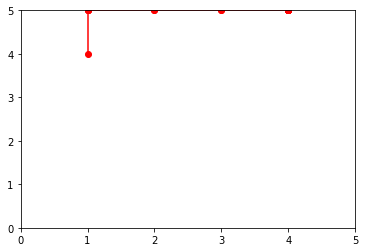

array([[ 1.,  5.,  7.],
       [ 1.,  5.,  8.],
       [ 2.,  5.,  9.],
       [ 3.,  5., 10.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5., 11.],
       [ 4.,  5.

In [405]:
route(optimal,[1,4,6],0)

In [406]:
######3i

In [407]:
t1 = time.time()

In [408]:
t1-t0

6.138072967529297

In [409]:
#######4a

In [410]:
def value_iteration(S,reward,Pe,theta,A):
    pi=[[['' for a in range(12)]for b in range(6)]for c in range(6)]
    V = np.zeros((6,6,12));
    Va= np.zeros(7);
#    pi= np.zeros((6,6,12));
    while True:

        delta=0;
        for i in range(432):
            Vtem=V[int(S[i][0]),int(S[i][1]),int(S[i][2])];
            n=0;
            Va= np.zeros(7);
            for a in A:
                Va[n]=0;
                Sn=nextallstates(S[i],a);
                for sn in Sn:
                    Va[n]=Va[n]+probsa(Pe,S[i],a,sn)*(reward[int(sn[0]),int(sn[1])]+0.9*V[int(sn[0]),int(sn[1]),int(sn[2])]);
                n=n+1;
            V[int(S[i][0]),int(S[i][1]),int(S[i][2])]=max(Va);
            print(pi[int(S[i][0])][int(S[i][1])][int(S[i][2])])
            pi[int(S[i][0])][int(S[i][1])][int(S[i][2])]=A[np.where(Va==max(Va))[0][0]];
            delta = max(delta, np.abs(Vtem - V[int(S[i][0]),int(S[i][1]),int(S[i][2])]));
           # print(delta)
        if delta<theta:
            break
    return pi, V

In [411]:
######4b

In [423]:
t2 = time.time()
theta=0.05
Pe=0
[pi4,V4]=value_iteration(S,R,Pe,theta,A);
t3 = time.time()

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
1.0
1.0
1.0
0.0
0.0
0.0

0.0
1.0
1.0
1.0
0.0
0.0
0.0

0.0
1.0
1.0
1.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
1.0
1.0
1.0

0.0
0.0
0.0
0.0
1.0
1.0
1.0

0.0
0.0
0.0
0.0
1.0
1.0
1.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
1.0
1.0
1.0
0.0
0.0
0.0

0.0
1.0
1.0
1.0
0.0
0.0
0.0

0.0
1.0
1.0
1.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
1.0
1.0
1.0

0.0
0.0
0.0
0.0
1.0
1.0
1.0

0.0
0.0
0.0
0.0
1.0
1.0
1.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
1.0
1.0
1.0
0.0
0.0
0.0

0.0
1.0
1.0
1.0
0.0
0.0
0.0

0.0
1.0
1.0
1.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
1.0
1.0
1.0

0.0
0.0
0.0
0.0
1.0
1.0
1.0

0.0
0.0
0.0
0.

4.0
3.0
3.0
3.0
5.0
5.0
5.0

4.0
4.0
4.0
4.0
4.0
4.0
4.0

4.0
4.0
4.0
4.0
4.0
4.0
4.0

4.0
4.0
4.0
4.0
4.0
4.0
4.0

4.0
5.0
5.0
5.0
3.0
3.0
3.0

4.0
5.0
5.0
5.0
3.0
3.0
3.0

4.0
5.0
5.0
5.0
3.0
3.0
3.0

4.0
4.0
4.0
4.0
4.0
4.0
4.0

4.0
4.0
4.0
4.0
4.0
4.0
4.0

4.0
4.0
4.0
4.0
4.0
4.0
4.0

4.0
3.0
3.0
3.0
5.0
5.0
5.0

4.0
3.0
3.0
3.0
5.0
5.0
5.0

4.0
3.0
3.0
3.0
5.0
5.0
5.0

4.0
4.0
4.0
4.0
4.0
4.0
4.0

4.0
4.0
4.0
4.0
4.0
4.0
4.0

4.0
4.0
4.0
4.0
4.0
4.0
4.0

4.0
5.0
5.0
5.0
3.0
3.0
3.0

4.0
5.0
5.0
5.0
3.0
3.0
3.0

4.0
5.0
5.0
5.0
3.0
3.0
3.0

4.0
4.0
4.0
4.0
4.0
4.0
4.0

4.0
4.0
4.0
4.0
4.0
4.0
4.0

4.0
4.0
4.0
4.0
4.0
4.0
4.0

4.0
3.0
3.0
3.0
5.0
5.0
5.0

4.0
3.0
3.0
3.0
5.0
5.0
5.0

4.0
3.0
3.0
3.0
5.0
5.0
5.0

4.0
4.0
4.0
4.0
4.0
4.0
4.0

5.0
5.0
5.0
5.0
5.0
5.0
5.0

5.0
5.0
5.0
5.0
5.0
5.0
5.0

5.0
5.0
5.0
5.0
4.0
4.0
4.0

5.0
5.0
5.0
5.0
4.0
4.0
4.0

5.0
5.0
5.0
5.0
4.0
4.0
4.0

5.0
5.0
5.0
5.0
5.0
5.0
5.0

5.0
5.0
5.0
5.0
5.0
5.0
5.0

5.0
5.0
5.0
5.0
5.0
5.0
5.0

5.0
4.0
4.0
4.

2.0
2.0
ST
2.0
2.0
2.0
2.0
2.0
2.0
2.0
ST
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
ST
2.0
2.0
2.0
2.0
2.0
2.0
2.0
ST
2.0
2.0
2.0
2.0
2.0
2.0
2.0
ST
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BR
2.0
3.0
3.0
3.0
1.0
1.0
1.0
ST
2.0
3.0
3.0
3.0
1.0
1.0
1.0
ST
2.0
3.0
3.0
3.0
1.0
1.0
1.0
ST
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FR
2.0
1.0
1.0
1.0
3.0
3.0
3.0
ST
2.0
1.0
1.0
1.0
3.0
3.0
3.0
ST
2.0
1.0
1.0
1.0
3.0
3.0
3.0
ST
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FR
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
2.0
2.0
2.0
4.0
4.0
4.0


0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
ST
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
ST
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
ST
0.0
1.0
1.0
1.0
0.0


5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
4.0
4.0


3.0
3.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FR
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FR
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
FL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0


4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0


FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BS
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BR
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FR
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1

5.0
5.0
5.0
4.0
4.0
4.0
BR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0


4.0
4.0
4.0
2.0
2.0
2.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FR
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FR
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FS
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FS
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
3.0
3.0


0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
FL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FR
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FR
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BR
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BR
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FS
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BS
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BR
1.0
2.0
2.0
2.0
0.0


4.0
4.0
4.0
4.0
BR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
FL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
4.0
4.0
4.0
5.0


3.0
3.0
3.0
BL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
FR
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FR
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FR
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FR
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FS
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FS
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0


0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
BL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
FL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FR
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FR
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0


BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
FL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
4

4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
FL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4

3.0
3.0
BL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
FL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
ST
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BR
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FR
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
FL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FR
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BR
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
FL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BR
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0


0.0
0.0
0.0
0.0
0.0
BR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0


5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
ST
4.0
4.0
4.0
4.0
4.0
4.0
4.0
ST
4.0
4.0
4.0
4.0
4.0
4.0
4.0
ST
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
ST
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0


2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FR
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FR
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
FL
4.0
5.0
5.0
5.0


1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FR
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FL
1

4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0


3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FS
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
4.0
4.0
4.0
2.0
2.0
2.0


0.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FR
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1

FL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FR
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FR
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BR
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BR
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FS
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BS
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BR
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1

5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
4.0
4.0


4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
5.0
5.0
5.0
3.0
3.0
3.0


2.0
2.0
2.0
2.0
2.0
2.0
ST
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
FL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
ST
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BR
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FR
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
FL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FR
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BR
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
FL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BR
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0


0.0
0.0
FR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FS
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BR
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BS
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0


4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
ST
4.0
4.0
4.0
4.0
4.0
4.0
4.0
ST
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
ST
4.0
4.0
4.0
4.0
4.0
4.0
4.0
ST
4.0
4.0
4.0
4.0
4.0
4.0
4.0
ST
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
ST
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0


2.0
2.0
2.0
0.0
0.0
0.0
FL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FR
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
FR
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FR
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BR
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
FL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
ST
2.0
2.0
2.0
2.0
2.0
2.0
2.0
ST
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
ST
2.0
2.0
2.0
2.0
2.0
2.0
2.0
ST
2.0
2.0
2.0
2.0
2.0
2.0
2.0
ST
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
FL
2.0
1.0
1.0


4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BR
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FS
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BR
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BS
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
0.0
0.0
0.0


4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FR
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FR
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
FL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0


BL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FR
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
FR
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FR
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BR
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
FL
2.0
1

5.0
FS
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BR
5

3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
4.0
4.0
4.0
2.0
2.0
2.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
2.0
2.0
2.0
4.0
4.0
4.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
ST
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FR
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
2.0
2.0


1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FS
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FL
1.0
2.0
2.0
2.0
0.0
0.0
0.0
FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BS
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BL
1.0
0.0
0.0
0.0
2.0
2.0
2.0
BS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BR
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FR
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
BS
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
2.0
2.0
2.0
0.0
0.0
0.0
ST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FL
1.0
1.0
1.0
1.0
1.0
1.0
1.0
FS
1.0
0.0
0.0
0.0
2.0
2.0
2.0
ST
1.0
0.0
0.0


4.0
BS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BL
5.0
5.0
5.0
5.0
4.0
4.0
4.0
BS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5.0
5.0
5.0
5.0
5.0
5.0
5.0
BR
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FL
5.0
4.0
4.0
4.0
5.0
5.0
5.0
FS
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FR
5.0
5.0
5.0
5.0
5.0
5.0
5.0
FL
5

4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
FL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0


2.0
2.0
2.0
2.0
ST
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
FL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
ST
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BR
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FR
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
FL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FR
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BR
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
FL
2.0
1.0
1.0
1.0
3.0
3.0
3.0
BR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
FR
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BL
2.0
2.0
2.0
2.0
2.0
2.0
2.0
BR
2.0
3.0
3.0
3.0
1.0
1.0
1.0
FL
2.0
3.0
3.0
3.0
1.0


0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BL
0.0
0.0
0.0
0.0
1.0
1.0
1.0
BR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
BR
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FL
0.0
1.0
1.0
1.0
0.0
0.0
0.0
FR
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0
0.0
0.0
FL
0.0
0.0
0.0
0.0
0.0


5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
FL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0


2.0
2.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FL
3.0
4.0
4.0
4.0
2.0
2.0
2.0
FR
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
3.0
3.0
3.0
3.0
3.0
3.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FL
3.0
2.0
2.0
2.0
4.0
4.0
4.0
FR
3.0
3.0
3.0
3.0
3.0
3.0
3.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FR
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
FL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
BR
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
FL
4.0
4.0
4.0
4.0
4.0
4.0
4.0
ST
4.0
4.0
4.0
4.0
4.0
4.0
4.0
ST
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BL
4.0
5.0
5.0
5.0
3.0
3.0
3.0
BR
4.0
4.0
4.0
4.0
4.0
4.0
4.0
ST
4.0
4.0
4.0
4.0
4.0
4.0
4.0
ST
4.0
4.0
4.0
4.0
4.0
4.0
4.0
ST
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0
FL
4.0
3.0
3.0
3.0
5.0
5.0
5.0


In [424]:
def route (policy,s0,pe):
    curstate = s0;
    path = np.zeros((100,3));
    for i in range(100) :
        act = policy[curstate[0]][curstate[1]][curstate[2]];
        n_state = nextstate(pe,curstate,act);
        path[i,:] = n_state;
        plt.plot([curstate[0],n_state[0]],[curstate[1],n_state[1]],'ro-');
        curstate = n_state;
    plt.xlim(0,5)
    plt.ylim(0,5)
    plt.show();
    return path

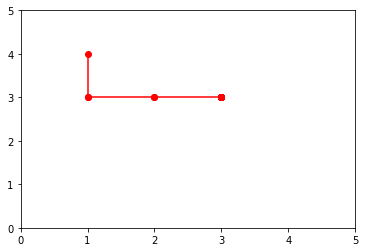

array([[1., 3., 5.],
       [2., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3., 4.],
       [3., 3

In [425]:
route(pi4,[1,4,6],0.1)

In [415]:
######4c

In [416]:
t3-t2

19.588751554489136

In [417]:
#####5a

IndexError: list index out of range

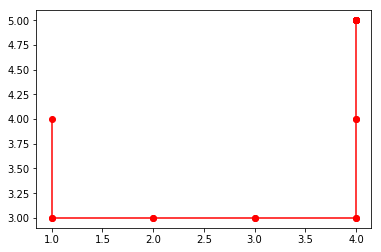

In [418]:
route(pi0,[1,4,6],0.25)

In [419]:
######5b

In [420]:
def evalpolicype (pe,policy,discount):
    v = np.zeros((6,6,12));
    x = np.ones((6,6,12))
    while (np.amax(x)>0.01):
        v_old = copy.deepcopy(v);
        for i in range(6):
            for y in range(6):
                for u in range(12):
                    for a in range(100):
                        output = []
                        ref = []
                        nx = nextstate(pe,[i,y,u],policy[i][y][u])
                        recof = [nx[0],nx[1]]
                        if nx not in output:
                            output.append(nx)
                            ref.append(ref)
                    print(output)
                    for c in range(3):
                        v[i,y,u] = v[i,y,u]+probsa(pe,[i,y,u],policy[i][y][u],output[c])*(R[ref[c]]+discount*v[i,y,u])

                    
                    x = v-v_old;
    return v

In [421]:

def interateprocesspe (discount,pe):
    pi_prac=[[['FR' for a in range(12)]for b in range(6)]for c in range(6)]
    pi_op=[[['FL' for a in range(12)]for b in range(6)]for c in range(6)]
    while (pi_op != pi_prac):
        pi_prac = pi_op
        value = evalpolicype (pe,pi_prac,discount);
        pi_op = policyiteration (value, discount)
    return pi_op

In [422]:
interateprocesspe (0.9,0.25)

[[0, 1, -1]]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices